Даны точки x и y в файле data_for_regression.csv, необходимо построить модель зависимости y от x и дать прогноз.

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [224]:
# Импорт набора данных
data = pd.read_csv('test.csv')
data.head(10)

,x,y
0,0.000000,-inf
1,0.025183,-10.149463
2,0.050366,-7.517911
3,0.075549,-5.480920
4,0.100732,-5.882184
5,0.125916,-3.672119
6,0.151099,-2.887261
7,0.176282,-2.849505
8,0.201465,-2.371847
9,0.226648,-3.015706


In [225]:
#Уберем -inf для построения линейной регресии
data = data.drop(0, axis = 0)
data.head()

,x,y
1,0.025183,-10.149463
2,0.050366,-7.517911
3,0.075549,-5.480920
4,0.100732,-5.882184
5,0.125916,-3.672119


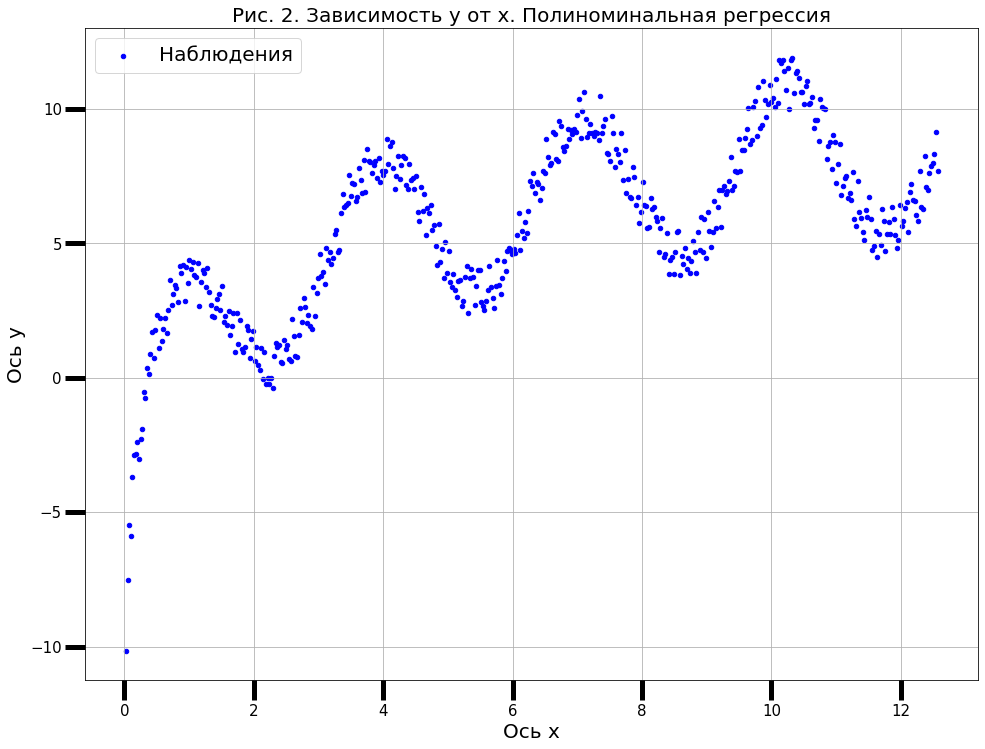

In [228]:
# Построим график зависимости у от х
data.plot(x='x',y='y', kind='scatter', 
           color='blue', figsize = (16, 12), fontsize = 15, label = 'Наблюдения')
plt.title('Рис. 2. Зависимость у от x. Полиноминальная регрессия', fontsize=20)
plt.xlabel('Ось x', fontsize = 20)
plt.ylabel('Ось y', fontsize = 20)
plt.legend(loc="upper left", fontsize=20)
plt.grid()
plt.show()

In [216]:
X=data.iloc[:,0].to_numpy()
X=X.reshape(-1,1)
y=data.iloc[:,1].to_numpy()
y=y.reshape(-1,1)

# Разобьём выборку на Тренировочную и тестовую

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Сохраним упорядоченные индексы наших элементов
# Это понадобится для визуализации!

index_argsort = np.argsort(X_train.reshape(399,))

In [217]:
# Построим и обучим модель

poly = PolynomialFeatures(degree = 13)
poly.fit(X_train,y_train)
X_poly = poly.transform(X_train)
X_poly_test = poly.transform(X_test)


model = LinearRegression(normalize = True)
model.fit(X_poly,y_train)

y_pred = model.predict(X_poly)
y_pred_test = model.predict(X_poly_test)

print(f'MSE-train {round(metrics.mean_squared_error(y_train, y_pred), 4)}')
print(F'MSE-test {round(metrics.mean_squared_error(y_test, y_pred_test), 4)}')

MSE-train 0.3398
MSE-test 0.3365


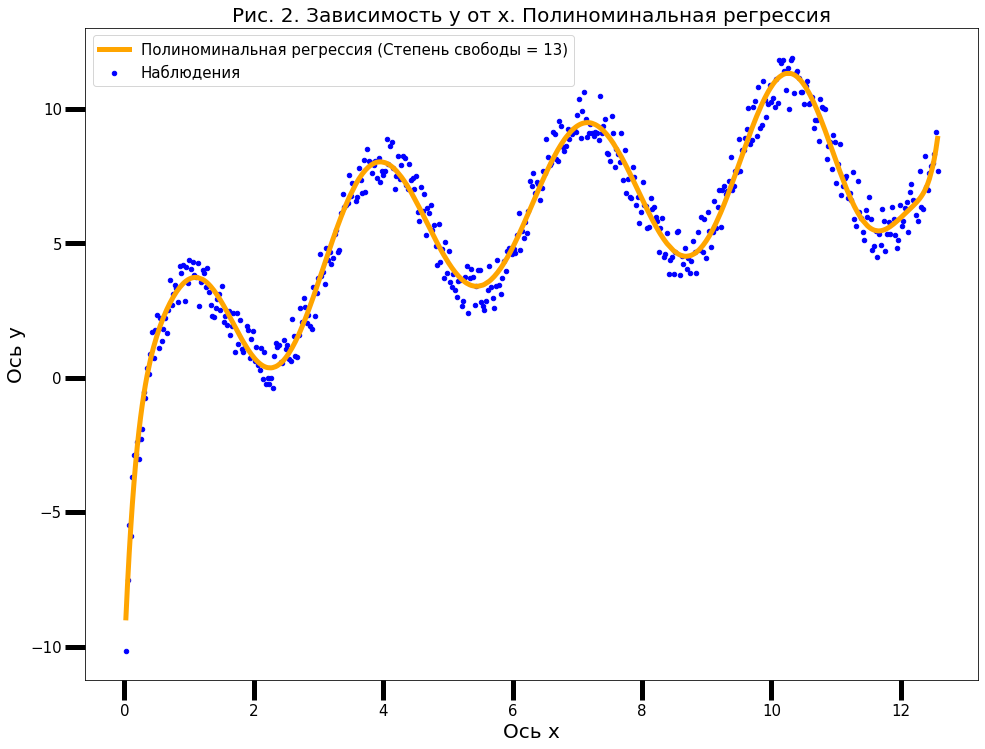

In [230]:
data.plot(x='x',y='y', kind='scatter', 
           color='blue', figsize = (16, 12), fontsize = 15, label = 'Наблюдения')
plt.title('Рис. 2. Зависимость у от x. Полиноминальная регрессия', fontsize=20)
plt.xlabel('Ось x', fontsize = 20)
plt.ylabel('Ось y', fontsize = 20)


plt.plot(X_train[index_argsort], model.predict(X_poly[index_argsort]),color = 'orange', 
         label = 'Полиноминальная регрессия (Степень свободы = 13)')
plt.legend(loc = 'upper left', fontsize = 15)
plt.show()

In [199]:
model.intercept_

array([-10.34406138])

In [181]:
coef = model.coef_
print(coef)

[[ 0.00000000e+00  5.94841702e+01 -1.36394101e+02  1.98563409e+02
  -1.79968896e+02  1.01663766e+02 -3.69342185e+01  8.90658962e+00
  -1.45405708e+00  1.61384439e-01 -1.19952224e-02  5.71436853e-04
  -1.57720718e-05  1.91801694e-07]]
